# Analizando el conjunto cáncer.

In [4]:
library(survival)

Warning message:
"package 'survival' was built under R version 3.6.3"

In [5]:
data(cancer)

In [6]:
help(cancer)

In [3]:
cancer[1:20,]

inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
3,306,2,74,1,1,90,100,1175,NA
3,455,2,68,1,0,90,90,1225,15
3,1010,1,56,1,0,90,90,NA,15
5,210,2,57,1,1,90,60,1150,11
1,883,2,60,1,0,100,90,NA,0
12,1022,1,74,1,1,50,80,513,0
7,310,2,68,2,2,70,60,384,10
11,361,2,71,2,2,60,80,538,1
1,218,2,53,1,1,70,80,825,16
7,166,2,61,1,2,70,70,271,34


In [6]:
sapply(cancer, function(x) sum(is.na(x)))

inst      time    status       age       sex   ph.ecog  ph.karno pat.karno 
        1         0         0         0         0         1         1         3 
 meal.cal   wt.loss 
       47        14

In [7]:
length(cancer$meal.cal)

[1] 228

No quitaremos columnas, quitar renglones de NA
Quitando renglones NA

In [17]:
cancer2<-na.omit(cancer)
cancer2

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
2,3,455,2,68,1,0,90,90,1225,15
4,5,210,2,57,1,1,90,60,1150,11
6,12,1022,1,74,1,1,50,80,513,0
7,7,310,2,68,2,2,70,60,384,10
8,11,361,2,71,2,2,60,80,538,1
9,1,218,2,53,1,1,70,80,825,16
10,7,166,2,61,1,2,70,70,271,34
11,6,170,2,57,1,1,80,80,1025,27
15,12,567,2,57,1,1,80,70,2600,60
17,22,613,2,70,1,1,90,100,1150,-5


In [18]:
sapply(cancer2, function(x) sum(is.na(x)))

inst      time    status       age       sex   ph.ecog  ph.karno pat.karno 
        0         0         0         0         0         0         0         0 
 meal.cal   wt.loss 
        0         0

## Descriptiva variable sex.

**Tabla de contingencia.**

In [19]:
table(cancer2$status, cancer2$sex)

   
     1  2
  1 21 26
  2 82 38

**Gráfica de pastel.**

In [20]:
sexo<-factor(cancer2$sex)
#1 hombre
#2 mujer

In [21]:
levels(sexo)<-c("Masculino", "Fememino")

In [22]:
table(sexo)

sexo
Masculino  Fememino 
      103        64 

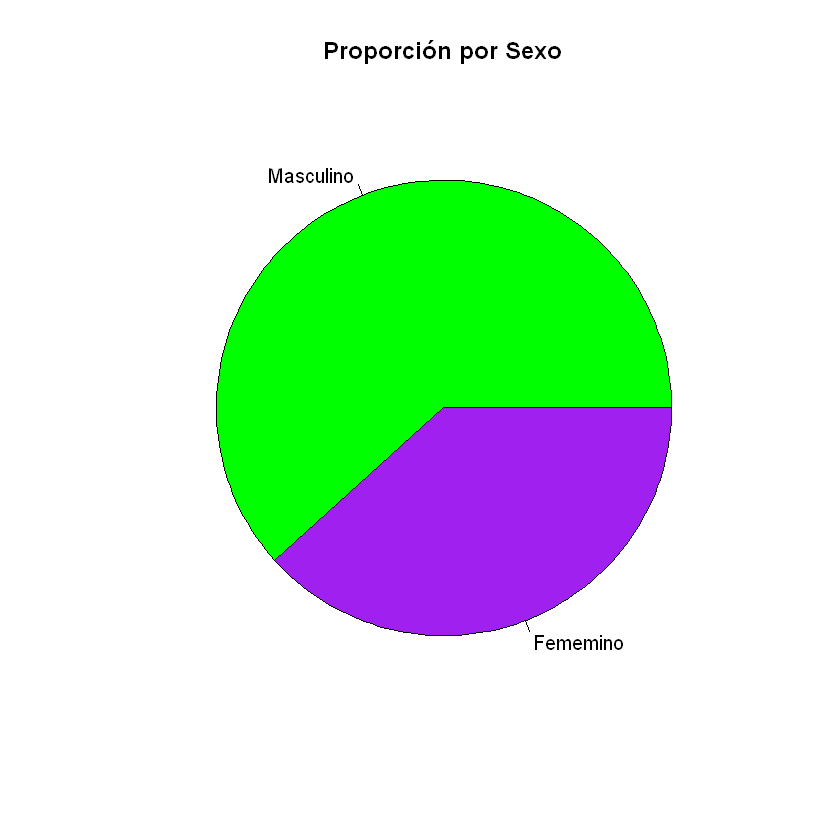

In [23]:
pie(table(sexo), col=c("green", "purple"), main="Proporción por Sexo")

**Respuesta compuesta.**

In [24]:
res.c<-Surv(cancer2$time, cancer2$status)#asociación del signo más
res.c

  [1]  455   210  1022+  310   361   218   166   170   567   613   707    61 
 [13]  301    81   371   520   574   118   390    12   473    26   107    53 
 [25]  814   965+   93   731   460   153   433   583    95   303   519   643 
 [37]  765    53   246   689     5   687   345   444   223    60   163    65 
 [49]  821+  428   230   840+  305    11   226   426   705   363   176   791 
 [61]   95   196+  167   806+  284   641   147   740+  163   655    88   245 
 [73]   30   477   559+  450   156   529+  429   351    15   181   283    13 
 [85]  212   524   288   363   199   550    54   558   207    92    60   551+
 [97]  293   353   267   511+  457   337   201   404+  222    62   458+  353 
[109]  163    31   229   156   291   179   376+  384+  268   292+  142   413+
[121]  266+  320   181   285   301+  348   197   382+  303+  296+  180   145 
[133]  269+  300+  284+  292+  332+  285   259+  110   286   270   225+  269 
[145]  225+  243+  276+  135    79    59   240+  202+  235+  239

In [25]:
cox1.cancer<-coxph(res.c~cancer2$inst+cancer2$age+cancer2$sex+cancer2$ph.ecog+cancer2$ph.karno+cancer2$pat.karno+cancer2$meal.cal+cancer2$wt.loss)
cox1.cancer

Call:
coxph(formula = res.c ~ cancer2$inst + cancer2$age + cancer2$sex + 
    cancer2$ph.ecog + cancer2$ph.karno + cancer2$pat.karno + 
    cancer2$meal.cal + cancer2$wt.loss)

                        coef  exp(coef)   se(coef)      z        p
cancer2$inst      -3.037e-02  9.701e-01  1.312e-02 -2.315 0.020619
cancer2$age        1.281e-02  1.013e+00  1.194e-02  1.073 0.283403
cancer2$sex       -5.666e-01  5.674e-01  2.014e-01 -2.814 0.004890
cancer2$ph.ecog    9.074e-01  2.478e+00  2.386e-01  3.803 0.000143
cancer2$ph.karno   2.658e-02  1.027e+00  1.163e-02  2.286 0.022231
cancer2$pat.karno -1.091e-02  9.891e-01  8.141e-03 -1.340 0.180160
cancer2$meal.cal   2.602e-06  1.000e+00  2.677e-04  0.010 0.992244
cancer2$wt.loss   -1.671e-02  9.834e-01  7.911e-03 -2.112 0.034647

Likelihood ratio test=33.7  on 8 df, p=4.609e-05
n= 167, number of events= 120 

In [26]:
summary(cox1.cancer)

Call:
coxph(formula = res.c ~ cancer2$inst + cancer2$age + cancer2$sex + 
    cancer2$ph.ecog + cancer2$ph.karno + cancer2$pat.karno + 
    cancer2$meal.cal + cancer2$wt.loss)

  n= 167, number of events= 120 

                        coef  exp(coef)   se(coef)      z Pr(>|z|)    
cancer2$inst      -3.037e-02  9.701e-01  1.312e-02 -2.315 0.020619 *  
cancer2$age        1.281e-02  1.013e+00  1.194e-02  1.073 0.283403    
cancer2$sex       -5.666e-01  5.674e-01  2.014e-01 -2.814 0.004890 ** 
cancer2$ph.ecog    9.074e-01  2.478e+00  2.386e-01  3.803 0.000143 ***
cancer2$ph.karno   2.658e-02  1.027e+00  1.163e-02  2.286 0.022231 *  
cancer2$pat.karno -1.091e-02  9.891e-01  8.141e-03 -1.340 0.180160    
cancer2$meal.cal   2.602e-06  1.000e+00  2.677e-04  0.010 0.992244    
cancer2$wt.loss   -1.671e-02  9.834e-01  7.911e-03 -2.112 0.034647 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  exp(coef) exp(-coef) lower .95 upper .95
cancer2$inst         0.

*El modelo es signicativo, por lo que al menos una de las variables es importantes*

*Voy a quitar meal.cal*

In [28]:
cox2.cancer<-coxph(res.c~cancer2$inst+cancer2$age+cancer2$sex+cancer2$ph.ecog+cancer2$ph.karno+cancer2$pat.karno+cancer2$wt.loss)
cox2.cancer

Call:
coxph(formula = res.c ~ cancer2$inst + cancer2$age + cancer2$sex + 
    cancer2$ph.ecog + cancer2$ph.karno + cancer2$pat.karno + 
    cancer2$wt.loss)

                       coef exp(coef)  se(coef)      z        p
cancer2$inst      -0.030375  0.970082  0.013104 -2.318 0.020455
cancer2$age        0.012791  1.012873  0.011766  1.087 0.276968
cancer2$sex       -0.566868  0.567299  0.200033 -2.834 0.004599
cancer2$ph.ecog    0.907317  2.477666  0.238504  3.804 0.000142
cancer2$ph.karno   0.026580  1.026936  0.011617  2.288 0.022136
cancer2$pat.karno -0.010896  0.989163  0.007999 -1.362 0.173133
cancer2$wt.loss   -0.016712  0.983427  0.007912 -2.112 0.034663

Likelihood ratio test=33.7  on 7 df, p=1.962e-05
n= 167, number of events= 120 

In [29]:
summary(cox2.cancer)

Call:
coxph(formula = res.c ~ cancer2$inst + cancer2$age + cancer2$sex + 
    cancer2$ph.ecog + cancer2$ph.karno + cancer2$pat.karno + 
    cancer2$wt.loss)

  n= 167, number of events= 120 

                       coef exp(coef)  se(coef)      z Pr(>|z|)    
cancer2$inst      -0.030375  0.970082  0.013104 -2.318 0.020455 *  
cancer2$age        0.012791  1.012873  0.011766  1.087 0.276968    
cancer2$sex       -0.566868  0.567299  0.200033 -2.834 0.004599 ** 
cancer2$ph.ecog    0.907317  2.477666  0.238504  3.804 0.000142 ***
cancer2$ph.karno   0.026580  1.026936  0.011617  2.288 0.022136 *  
cancer2$pat.karno -0.010896  0.989163  0.007999 -1.362 0.173133    
cancer2$wt.loss   -0.016712  0.983427  0.007912 -2.112 0.034663 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  exp(coef) exp(-coef) lower .95 upper .95
cancer2$inst         0.9701     1.0308    0.9455    0.9953
cancer2$age          1.0129     0.9873    0.9898    1.0365
cancer2$sex        

*La prueba es significativa, pero voy a quitar la edad*

In [30]:
summary(coxph(res.c~cancer2$inst+cancer2$sex+cancer2$ph.ecog+cancer2$ph.karno+cancer2$pat.karno+cancer2$wt.loss))


Call:
coxph(formula = res.c ~ cancer2$inst + cancer2$sex + cancer2$ph.ecog + 
    cancer2$ph.karno + cancer2$pat.karno + cancer2$wt.loss)

  n= 167, number of events= 120 

                       coef exp(coef)  se(coef)      z Pr(>|z|)    
cancer2$inst      -0.029154  0.971267  0.012955 -2.250 0.024420 *  
cancer2$sex       -0.562968  0.569516  0.199296 -2.825 0.004731 ** 
cancer2$ph.ecog    0.901508  2.463314  0.240839  3.743 0.000182 ***
cancer2$ph.karno   0.023804  1.024090  0.011400  2.088 0.036782 *  
cancer2$pat.karno -0.011548  0.988519  0.008026 -1.439 0.150201    
cancer2$wt.loss   -0.016810  0.983330  0.007811 -2.152 0.031383 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                  exp(coef) exp(-coef) lower .95 upper .95
cancer2$inst         0.9713     1.0296    0.9469    0.9962
cancer2$sex          0.5695     1.7559    0.3854    0.8417
cancer2$ph.ecog      2.4633     0.4060    1.5364    3.9493
cancer2$ph.karno     1.0241     0.9765    1.001

In [32]:
cox4.cancer<-coxph(res.c~cancer2$inst+cancer2$sex+cancer2$ph.ecog+cancer2$ph.karno+cancer2$wt.loss)
summary(coxph(res.c~cancer2$inst+cancer2$sex+cancer2$ph.ecog+cancer2$ph.karno+cancer2$wt.loss))

Call:
coxph(formula = res.c ~ cancer2$inst + cancer2$sex + cancer2$ph.ecog + 
    cancer2$ph.karno + cancer2$wt.loss)

  n= 167, number of events= 120 

                      coef exp(coef)  se(coef)      z Pr(>|z|)    
cancer2$inst     -0.030042  0.970404  0.012931 -2.323  0.02016 *  
cancer2$sex      -0.571959  0.564419  0.198865 -2.876  0.00403 ** 
cancer2$ph.ecog   0.993224  2.699926  0.232115  4.279 1.88e-05 ***
cancer2$ph.karno  0.021492  1.021725  0.011222  1.915  0.05547 .  
cancer2$wt.loss  -0.014800  0.985309  0.007664 -1.931  0.05348 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                 exp(coef) exp(-coef) lower .95 upper .95
cancer2$inst        0.9704     1.0305    0.9461    0.9953
cancer2$sex         0.5644     1.7717    0.3822    0.8334
cancer2$ph.ecog     2.6999     0.3704    1.7131    4.2553
cancer2$ph.karno    1.0217     0.9787    0.9995    1.0444
cancer2$wt.loss     0.9853     1.0149    0.9706    1.0002

Concordance= 0.641  (se = 0.

*Es significativa para un valor de 0.1*

*Hasta aquí el modelo elegido al 90%.*

## Residuos.

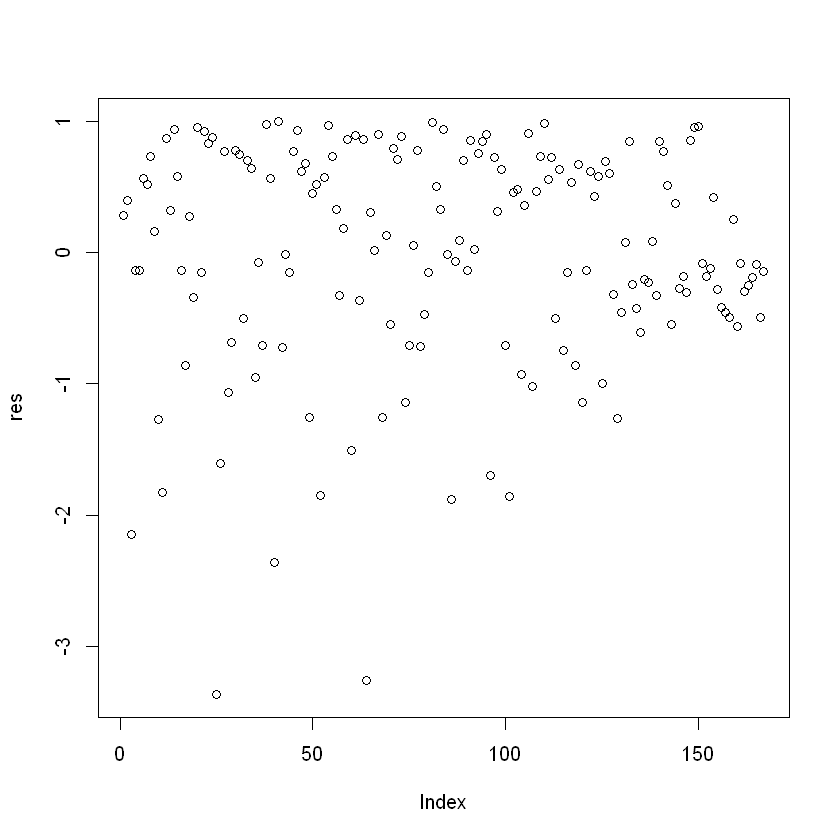

In [33]:
res<-resid(cox4.cancer, type="martingale")# Calculo de residuales
plot(res)

**Residuos de desvio**

In [36]:
d<-resid(cox4.cancer, type="deviance")

41 
3.157363

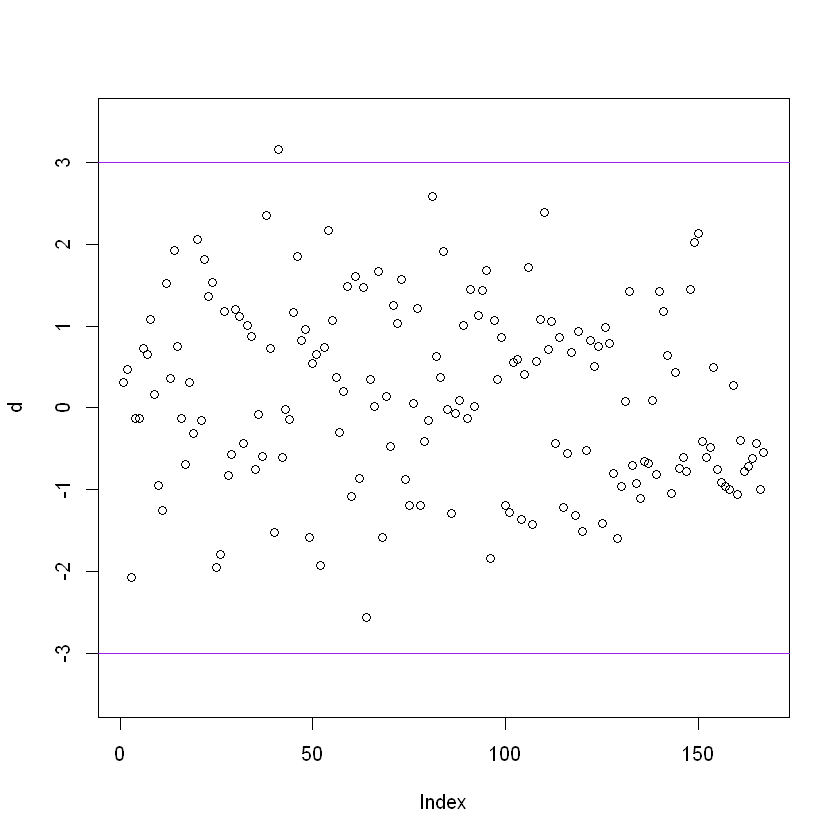

In [37]:
d[abs(d)>3]#detectar atipicos
plot(d, ylim=c(-3.5, 3.5))#plot de residuales
abline(h=c(-3,3), col="purple")#impresión de bandas para atipicos

**Elimando el atípico.**

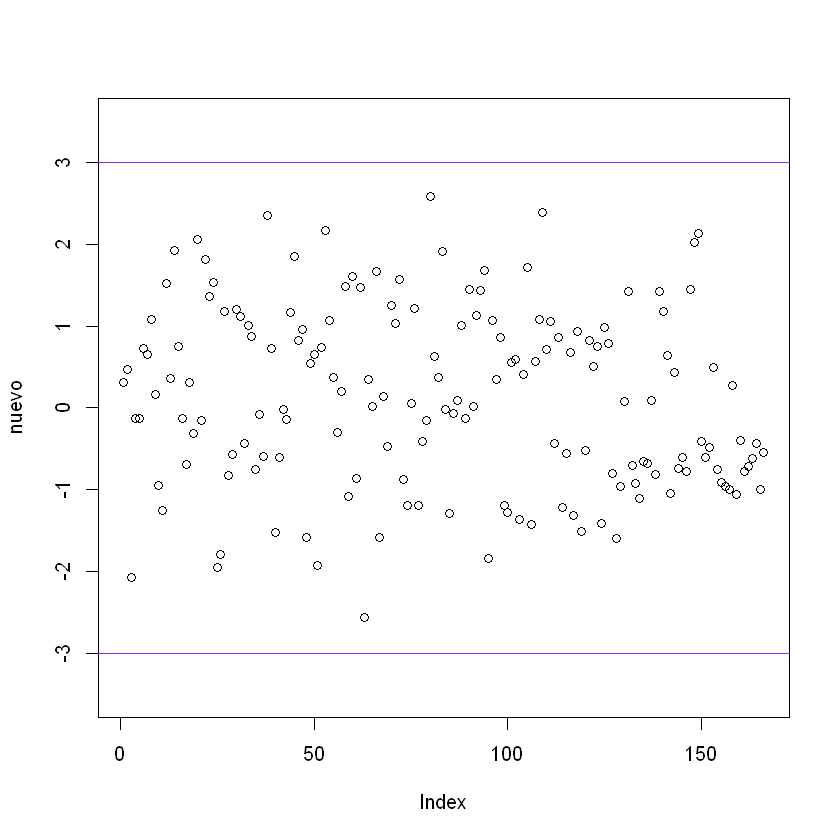

In [38]:
nuevo<-d[-41]
plot(nuevo,ylim=c(-3.5, 3.5))
abline(h=c(-3,3), col="purple")

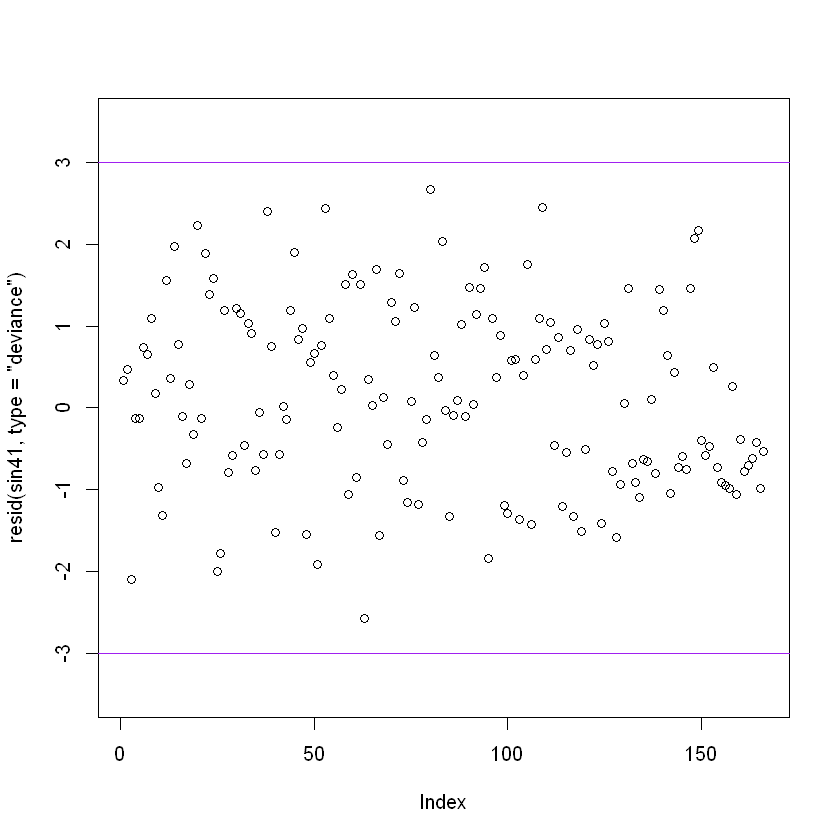

In [42]:
sin41<-cox4.cancer<-coxph(res.c[-41]~cancer2$inst[-41]+cancer2$sex[-41]+cancer2$ph.ecog[-41]+cancer2$ph.karno[-41]+cancer2$wt.loss[-41])
plot(resid(sin41, type="deviance"),ylim=c(-3.5, 3.5))
abline(h=c(-3,3), col="purple")

**Residuales de Schoenfeld.**

,cancer2$inst[-41],cancer2$sex[-41],cancer2$ph.ecog[-41],cancer2$ph.karno[-41],cancer2$wt.loss[-41]
11,-4.229700,-0.2516312,0.6887517,-8.00961047,-9.5388505
12,-8.311822,-0.2565167,0.7021241,-8.16512027,10.2759489
13,-8.448126,-0.2607233,0.7136382,-8.29901888,10.4444627
15,3.411025,-0.2650702,-1.2744639,11.56261772,0.6185955
26,-8.579707,-0.2657904,0.7220731,-18.40596429,10.6202763
30,2.302766,-0.2694313,0.7319643,1.34190618,-2.2342444
31,2.345912,-0.2744795,-1.2543213,21.36704883,17.7238936
53,2.368396,-0.2764252,0.7441037,-8.59773746,0.7697824
53,11.368396,-0.2764252,-1.2558963,11.40226254,-9.2302176
54,1.416922,-0.2800243,0.7498610,-18.67037126,-12.2398497


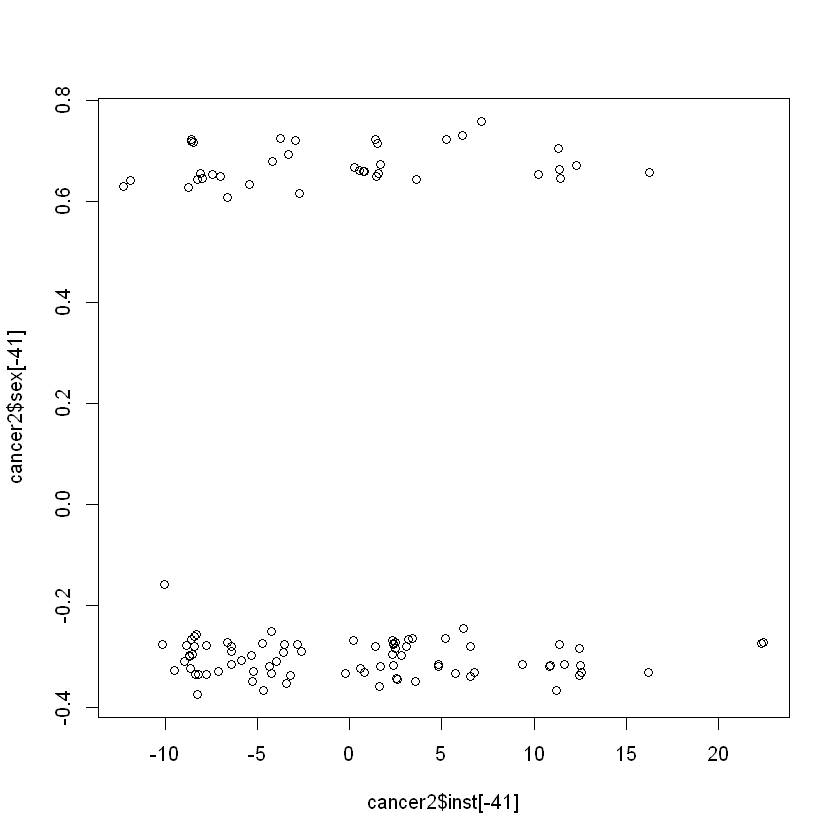

In [44]:
s<-resid(sin41, type="schoenfeld")
s#tengo vectores de residuales
plot(s) #esta combinando

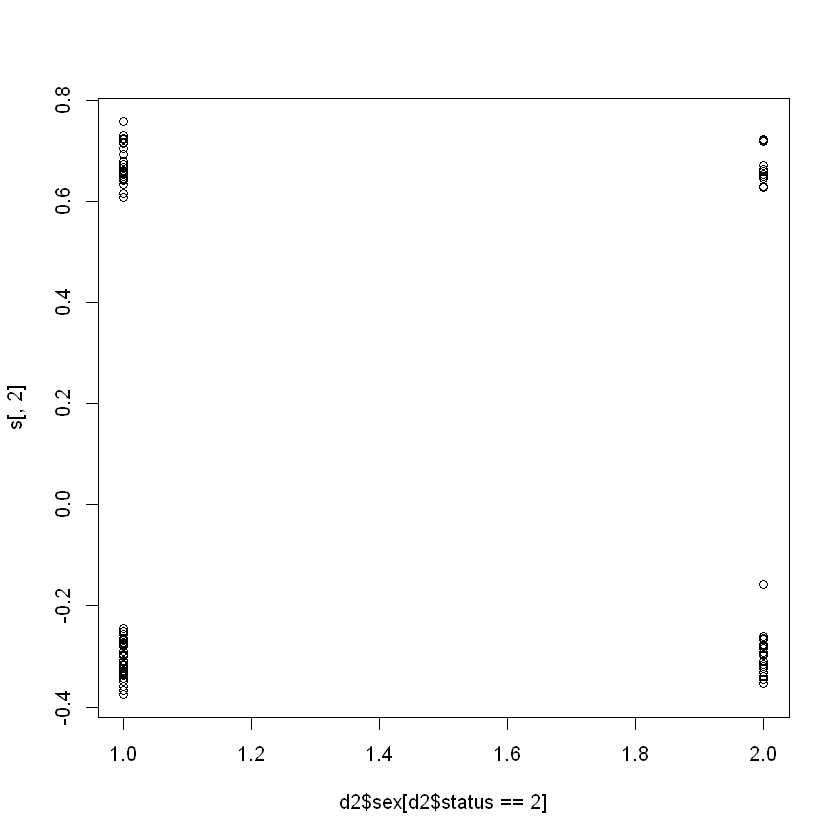

In [45]:
d2<-cancer2[-41,]#datos sin e renglon 41, todas las columnas
plot(d2$sex[d2$status==2], s[,2])#para la variable sex

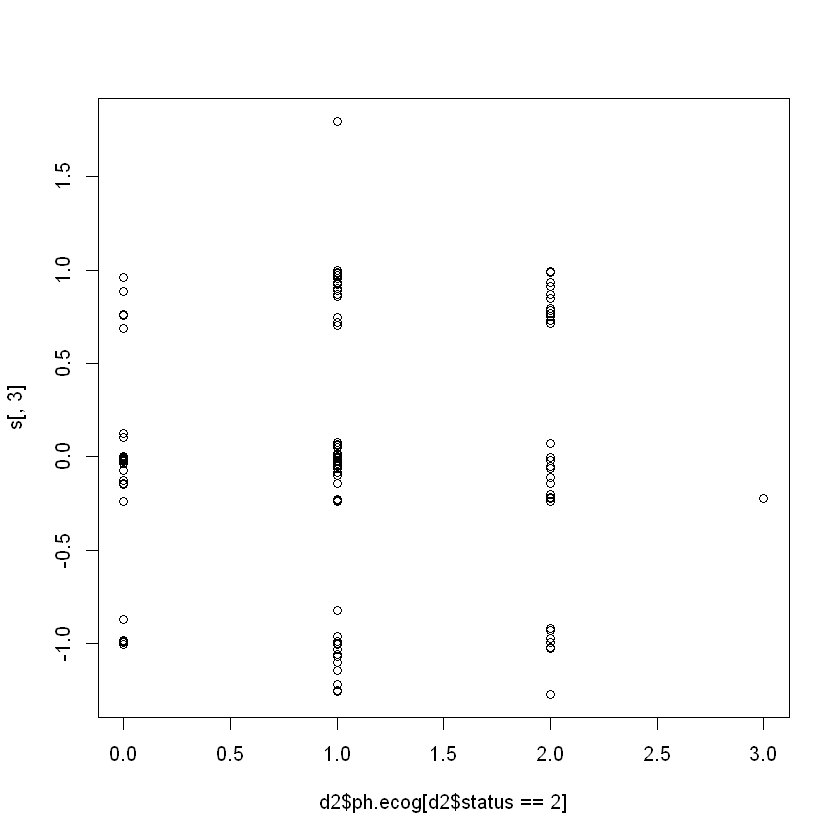

In [46]:
plot(d2$ph.ecog[d2$status==2], s[,3])#para la variable ph.ecog

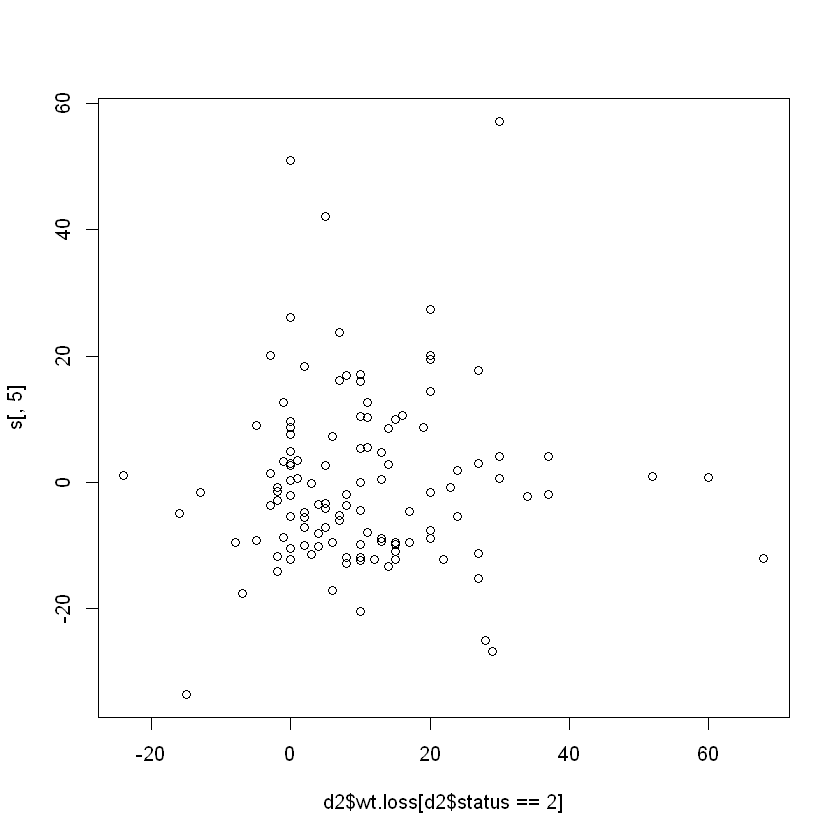

In [50]:
plot(d2$wt.loss[d2$status==2], s[,5])#para la variable inst

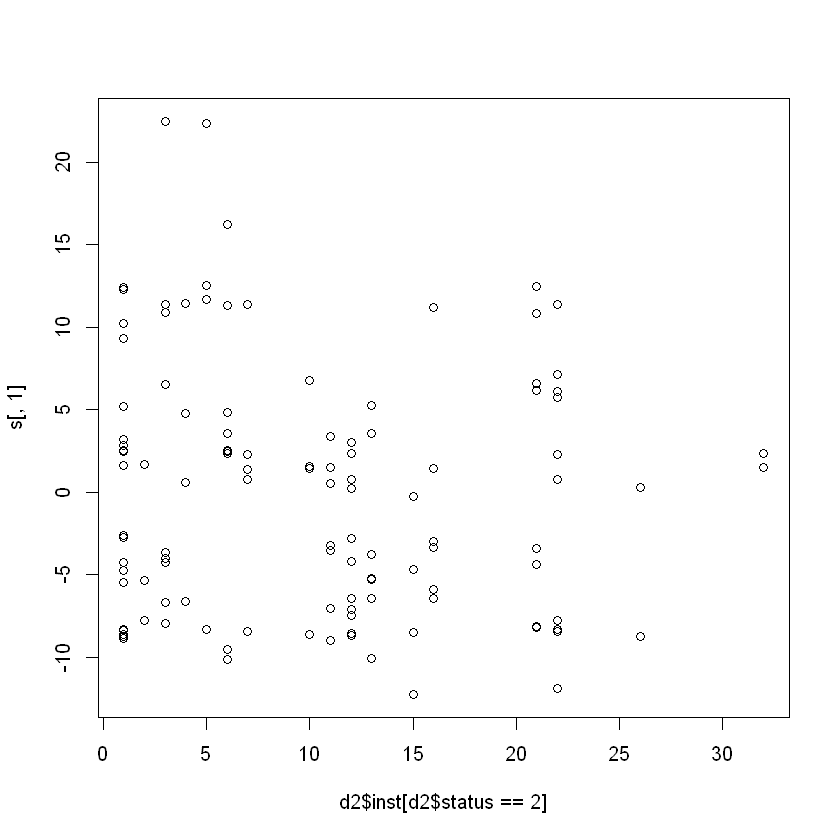

In [51]:
plot(d2$inst[d2$status==2], s[,1])#para la variable inst

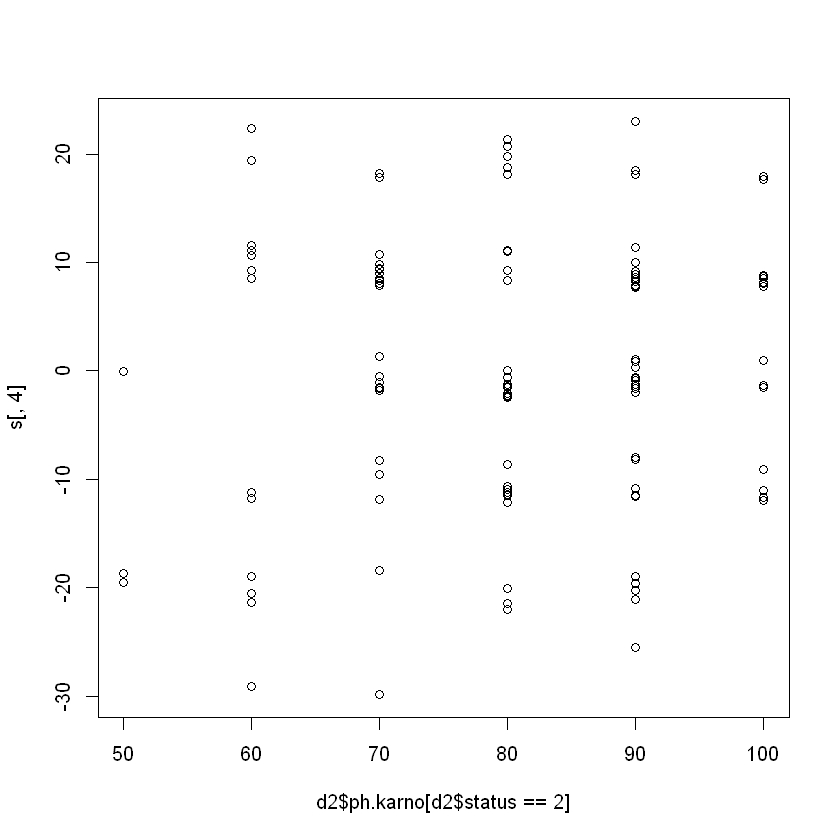

In [52]:
plot(d2$ph.karno[d2$status==2], s[,4])#para la variable inst

**Residuales de puntaje**

In [53]:
p<-resid(sin41, type="score")

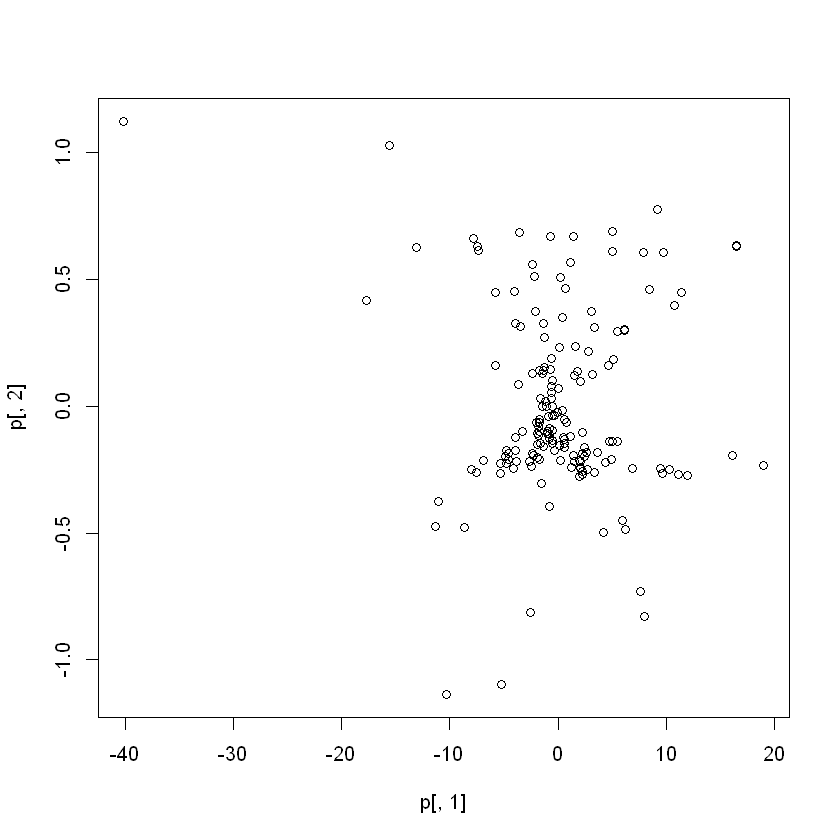

In [54]:
plot(p[,1], p[,2])# para revisar si hay un punto donde se esten concentrando

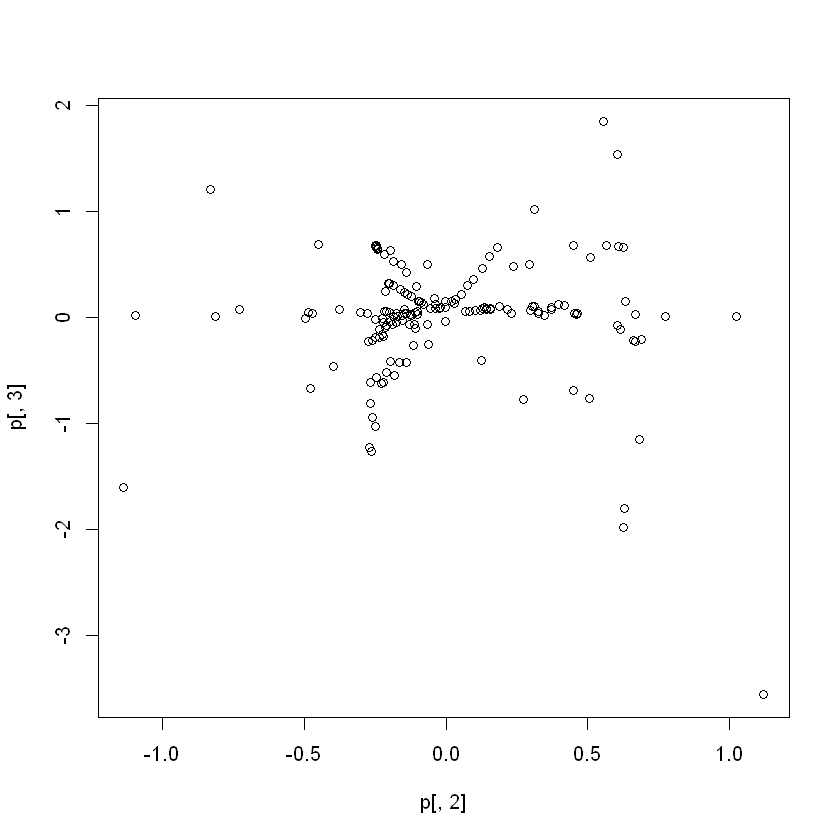

In [55]:
plot(p[,2], p[,3])# para revisar si hay un punto donde se esten concentrando

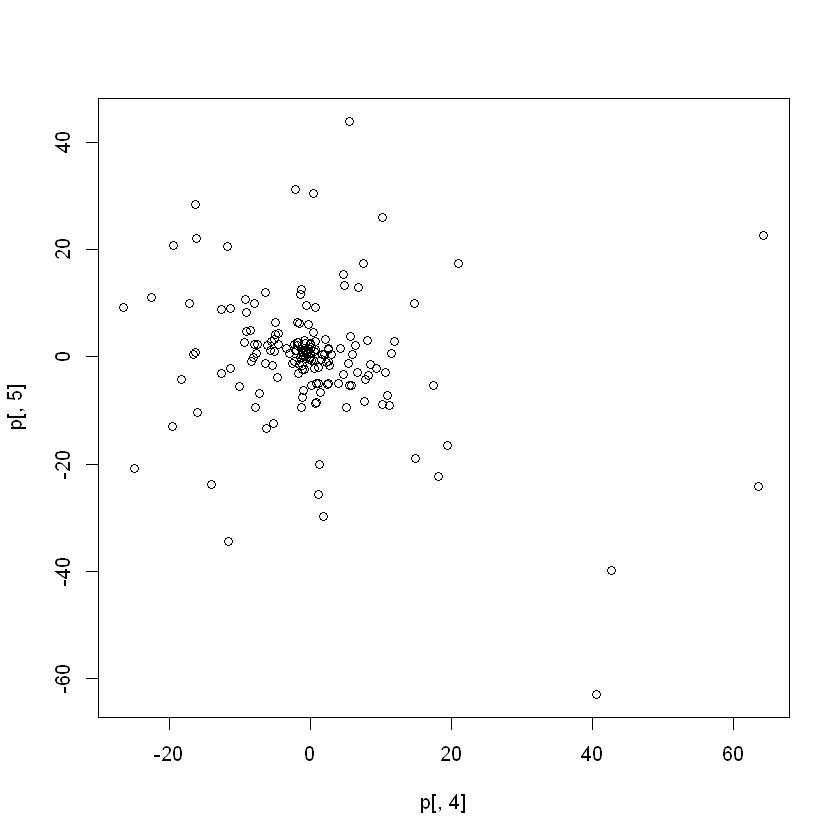

In [56]:
plot(p[,4], p[,5])# para revisar si hay un punto donde se esten concentrando

*Con los graficos anteriores vemos que el modelo viene bien*

## Estimación función de supervivencia gral.

In [58]:
cancer.sup<-survfit(sin41)
summary(cancer.sup)

Call: survfit(formula = sin41)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   11    166       1   0.9951 0.00492       0.9855        1.000
   12    165       1   0.9901 0.00701       0.9764        1.000
   13    164       1   0.9850 0.00864       0.9683        1.000
   15    163       1   0.9799 0.01003       0.9605        1.000
   26    162       1   0.9748 0.01124       0.9531        0.997
   30    161       1   0.9697 0.01234       0.9458        0.994
   31    160       1   0.9645 0.01338       0.9386        0.991
   53    159       2   0.9541 0.01523       0.9247        0.984
   54    157       1   0.9489 0.01607       0.9179        0.981
   59    156       1   0.9436 0.01688       0.9111        0.977
   60    155       2   0.9331 0.01839       0.8977        0.970
   61    153       1   0.9278 0.01909       0.8911        0.966
   62    152       1   0.9225 0.01977       0.8845        0.962
   65    151       1   0.9172 0.02042       0.8780        0.958
   79   

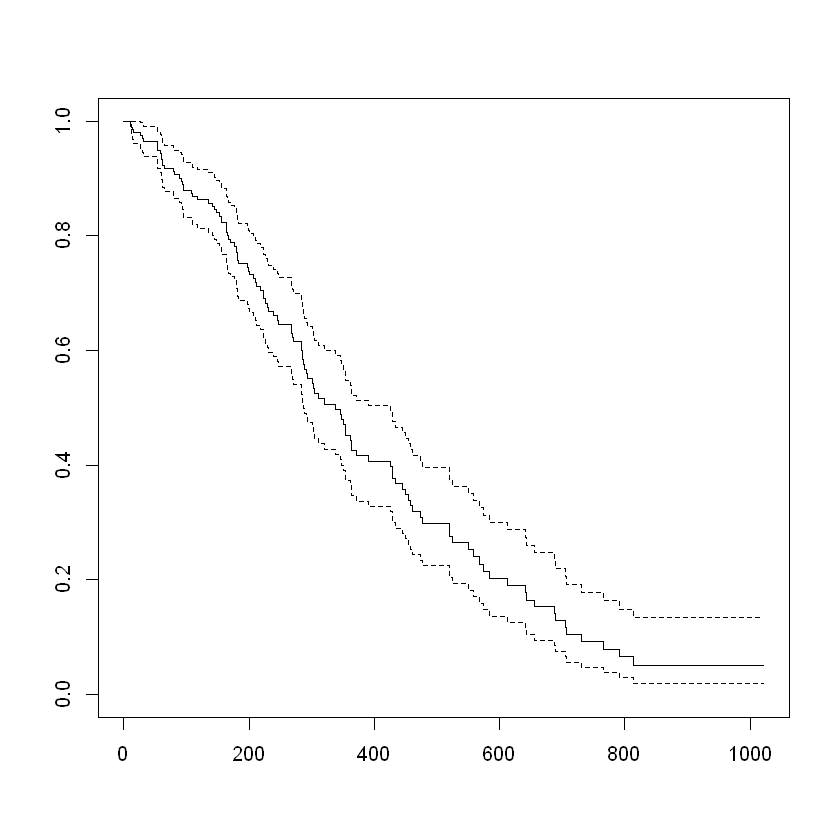

In [59]:
plot(cancer.sup)

In [61]:
km.sex<-survfit(res.c~cancer2$sex)
km.sex

Call: survfit(formula = res.c ~ cancer2$sex)

                n events median 0.95LCL 0.95UCL
cancer2$sex=1 103     82    284     223     353
cancer2$sex=2  64     38    426     345     641

In [62]:
summary(km.sex)

Call: survfit(formula = res.c ~ cancer2$sex)

                cancer2$sex=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   11    103       1   0.9903 0.00966       0.9715        1.000
   12    102       1   0.9806 0.01360       0.9543        1.000
   13    101       1   0.9709 0.01657       0.9389        1.000
   15    100       1   0.9612 0.01904       0.9246        0.999
   26     99       1   0.9515 0.02118       0.9108        0.994
   30     98       1   0.9417 0.02308       0.8976        0.988
   31     97       1   0.9320 0.02480       0.8847        0.982
   53     96       2   0.9126 0.02782       0.8597        0.969
   54     94       1   0.9029 0.02917       0.8475        0.962
   59     93       1   0.8932 0.03043       0.8355        0.955
   60     92       1   0.8835 0.03161       0.8237        0.948
   65     91       1   0.8738 0.03272       0.8119        0.940
   88     90       1   0.8641 0.03377       0.8004        0.933
   92     89       1   0.85

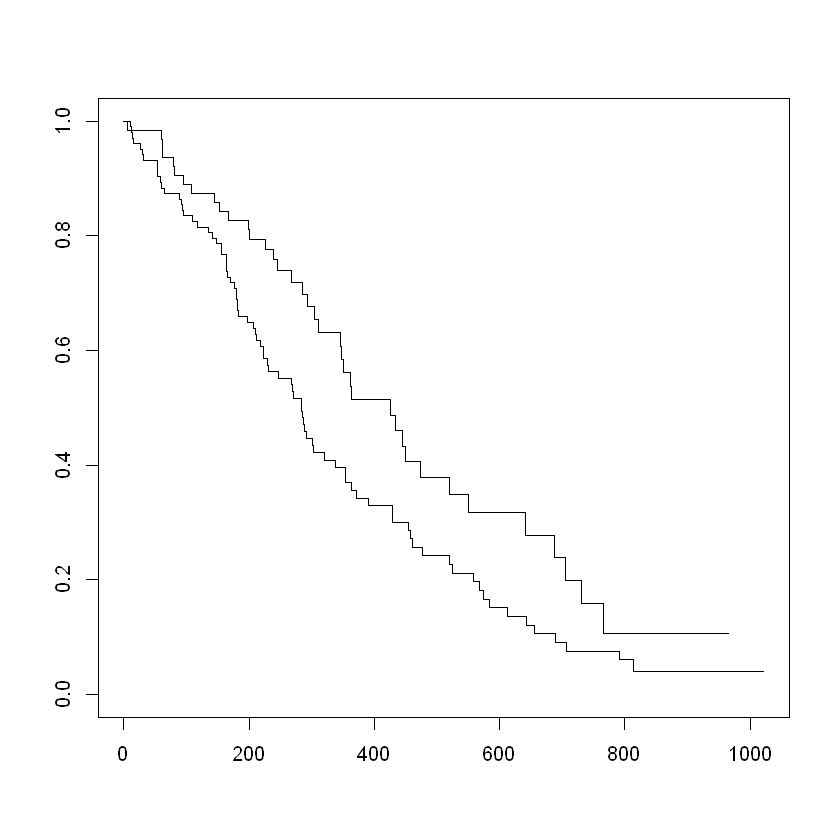

In [63]:
plot(km.sex)